In [1]:
import pandas as pd
import re
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
%matplotlib inline 
from wordcloud import WordCloud

In [5]:
columns=['text_review_english','label']
df = pd.read_excel(r'C:\Users\Hp\TUGAS AKHIR 2\data_playstore.xlsx', usecols=columns)
df = df.replace(r'^\s*$', np.nan, regex=True)
df.head()

,text_review_english,label
0,"['leg', 'uhhh']",positive
1,"['the internet', 'benerin', 'thx']",positive
2,"['fiber', 'optics', 'easy', 'breaking']",positive
3,"['indihome', 'connection', 'ugly', 'really', '...",negative
4,"['tide', 'fast', 'mbps', 'knp', 'skrg', 'mbps']",positive


In [6]:
df['polaritas'] = df.label.map({'positive':1, 'negative':-1})
df

,text_review_english,label,polaritas
0,"['leg', 'uhhh']",positive,1
1,"['the internet', 'benerin', 'thx']",positive,1
2,"['fiber', 'optics', 'easy', 'breaking']",positive,1
3,"['indihome', 'connection', 'ugly', 'really', '...",negative,-1
4,"['tide', 'fast', 'mbps', 'knp', 'skrg', 'mbps']",positive,1
...,...,...,...
87386,"['', 'login', 'most', 'expensive', 'doang']",positive,1
87387,"['', 'star', 'dlu', 'klu', 'signal', 'bonus', ...",positive,1
87388,"['hopefully', 'telkomsel', 'service', 'best', '']",positive,1
87389,"['simple', 'easy', 'type', 'transaction', 'tel...",positive,1


In [7]:
x = np.array(df['text_review_english'].transpose())
y = df['polaritas']
print (x.shape)
print (y.shape)

(87391,)
(87391,)


In [8]:
#vektorisasi
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(x)
print(x.shape)

(87391, 39270)


In [9]:
#splitting dataset ke dalam train dan test data (80 : 20)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

print ('\n total data train : ', ytrain.shape)
print ('\n total data test : ', ytest.shape)


 total data train :  (69912,)

 total data test :  (17479,)


In [10]:
print(xtrain.shape)
print(ytrain.shape)

(69912, 39270)
(69912,)


In [11]:
#klasifikasi data (80 : 20)
nb = MultinomialNB()

#memasukkan data training ke dalam klasifikasi naive bayes
nbtrain = nb.fit(xtrain, ytrain)

#melakukan prediksi dari data test
predicted = nbtrain.predict(xtest)
predicted

array([ 1,  1, -1, ...,  1,  1,  1], dtype=int64)

In [12]:
#Menentukan probabilitas hasil prediksi
nbtrain.predict_proba(xtest)

array([[0.0480705 , 0.9519295 ],
       [0.16834013, 0.83165987],
       [0.63485176, 0.36514824],
       ...,
       [0.13126682, 0.86873318],
       [0.25265073, 0.74734927],
       [0.11688242, 0.88311758]])

In [13]:
print(accuracy_score(ytest, predicted))

0.8224726815035185


In [14]:
print(classification_report(ytest, predicted))

              precision    recall  f1-score   support

          -1       0.81      0.69      0.75      6642
           1       0.83      0.90      0.86     10837

    accuracy                           0.82     17479
   macro avg       0.82      0.80      0.81     17479
weighted avg       0.82      0.82      0.82     17479



In [15]:
Final = df[['text_review_english', 'label', 'polaritas']]
Final = Final.rename(columns={'text_review_english':'Review', 'label':'Label', 'polaritas':'Polaritas'})
Final.to_excel('hasil_analisis_playstore.xlsx')

In [16]:
cnf_matrix = metrics.confusion_matrix(ytest, predicted)
cnf_matrix

array([[4588, 2054],
       [1049, 9788]], dtype=int64)

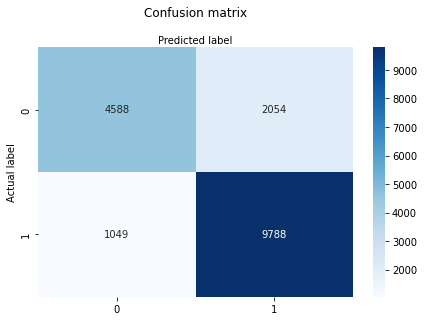

In [17]:
class_names=[-1,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [18]:
wordcloud = pd.Series(" ".join(df["text_review_english"]).split())
len(wordcloud)

1343117

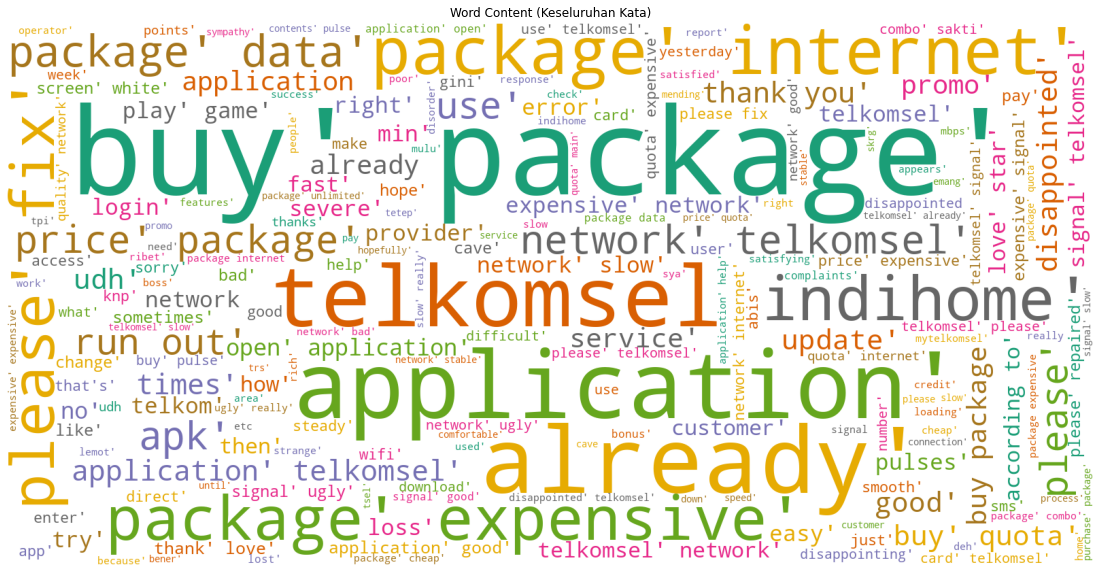

In [19]:
datacloud = " ".join(wordcloud)

%matplotlib inline
# Bigram (per dua kata) -> "collocations = True"
wordcloud_cld = WordCloud(background_color = "white", mode = "RGB", width = 1600, height = 800, colormap = "Dark2").generate(datacloud)
plt.figure(figsize = (20, 10))
plt.title("Word Content (Keseluruhan Kata)")
plt.imshow(wordcloud_cld)
plt.axis("off")
plt.show()

In [20]:
label_score = df["label"].value_counts()
label_score

positive    54553
negative    32838
Name: label, dtype: int64

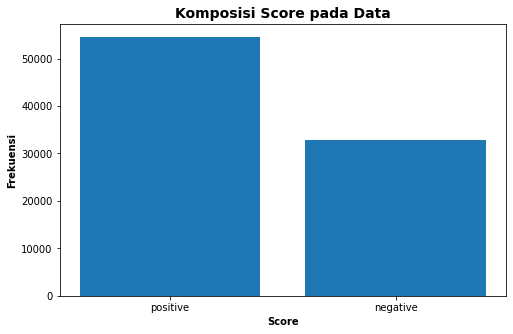

In [21]:
label_score_x = label_score.index
label_score_y = label_score.values

plt.figure(figsize = (8, 5))
plt.bar(label_score_x, label_score_y)
plt.xlabel("Score", fontweight = 'bold')
plt.ylabel("Frekuensi", fontweight = 'bold')
plt.title("Komposisi Score pada Data", fontweight = 'bold', fontsize = 14)
plt.show()

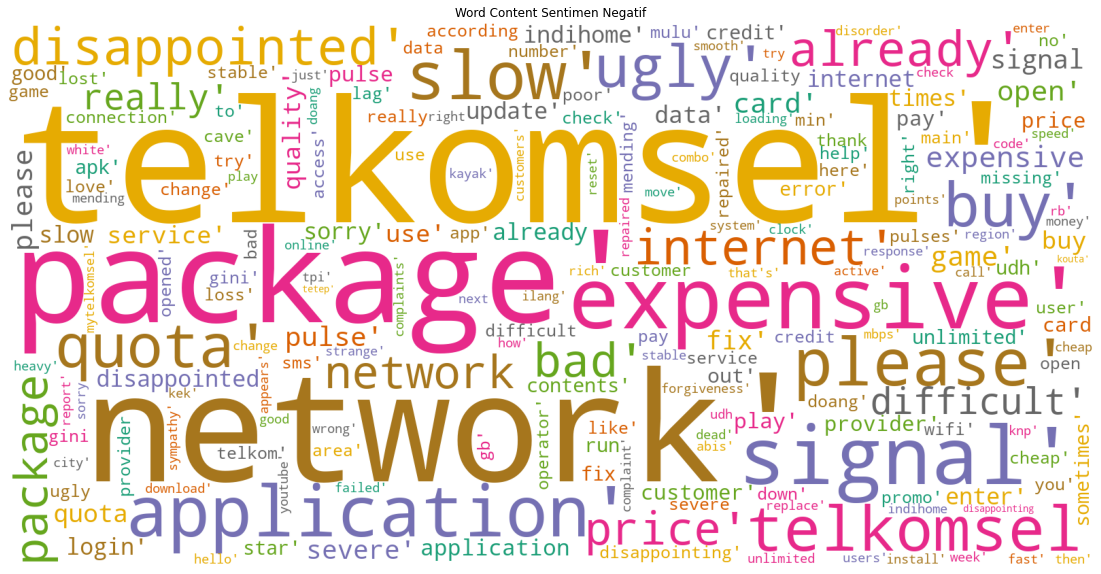

In [22]:
word_negatif = pd.Series(" ".join(df[df["polaritas"]== -1] ["text_review_english"]).split())
data_negatif = " ".join(word_negatif)

%matplotlib inline
# Unigram (per satu kata) -> "collocations = False"
wordcloud_negatif = WordCloud(background_color = "white", mode = "RGB", width = 1600, height = 800, colormap = "Dark2", collocations = False).generate(data_negatif)
plt.figure(figsize = (20, 10))
plt.title("Word Content Sentimen Negatif")
plt.imshow(wordcloud_negatif)
plt.axis("off")
plt.show()

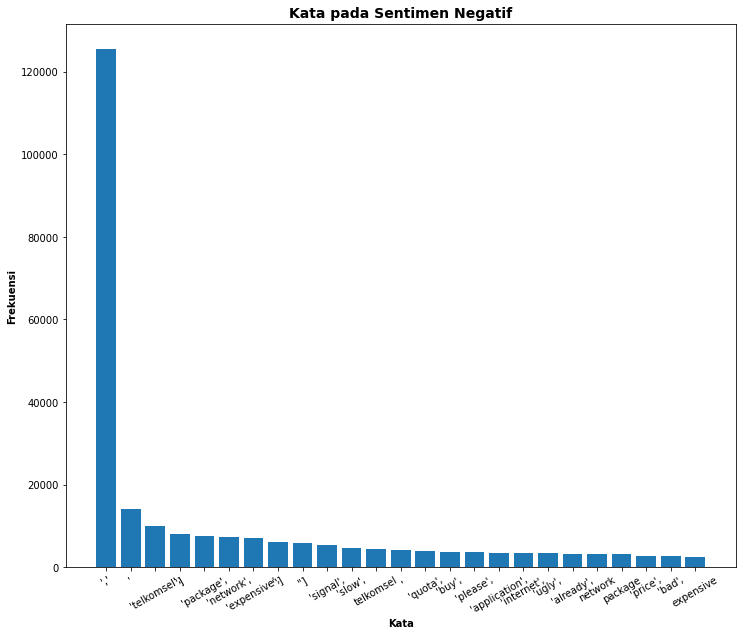

In [23]:
negatif_kata = word_negatif.value_counts().nlargest(25)

negatif_x = negatif_kata.index
negatif_y = negatif_kata.values

plt.figure(figsize = (12, 10))
plt.bar(negatif_x, negatif_y)
plt.xlabel("Kata", fontweight ='bold')
plt.ylabel("Frekuensi", fontweight ='bold')
plt.title("Kata pada Sentimen Negatif", fontweight ='bold', fontsize = 14)
plt.xticks(negatif_x, rotation = 30)
plt.show()

In [24]:
negatif_score = word_negatif.value_counts()
negatif_score

','                            125398
'                               14174
'telkomsel',                     9856
']                               8087
'package',                       7569
                                ...  
'asem',                             1
brrti                               1
waah                                1
diblg                               1
'hancuuuuuuuurrrrrrrrrrrr']         1
Length: 37523, dtype: int64

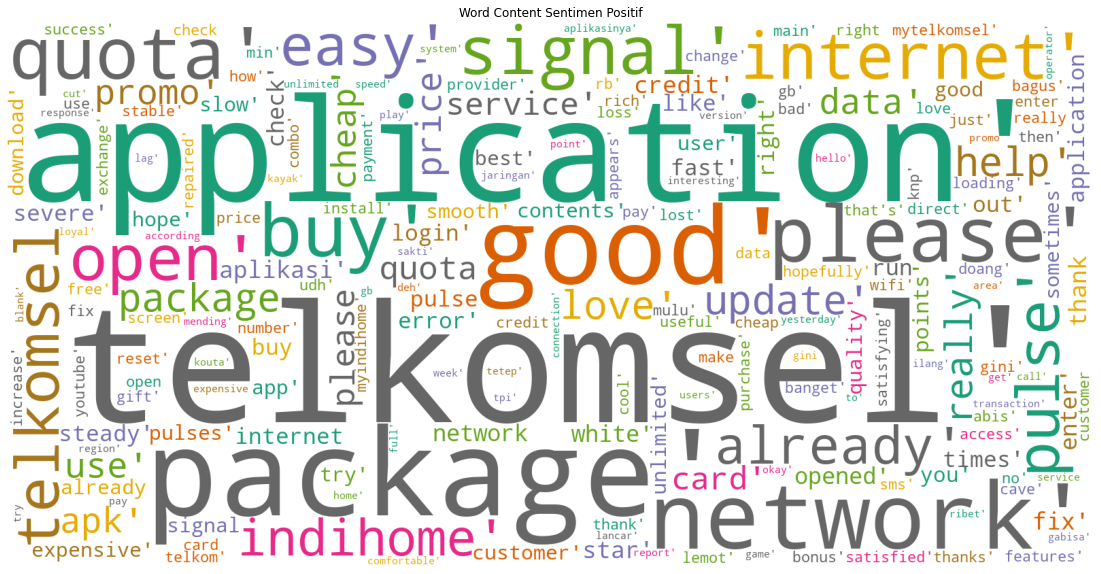

In [25]:
word_positif = pd.Series(" ".join(df[df["polaritas"]== 1] ["text_review_english"]).split())
data_positif = " ".join(word_positif)

%matplotlib inline
# Unigram (per satu kata) -> "collocations = False"
wordcloud_positif = WordCloud(background_color = "white", mode = "RGB", width = 1600, height = 800, colormap = "Dark2", collocations = False).generate(data_positif)
plt.figure(figsize = (20, 10))
plt.title("Word Content Sentimen Positif")
plt.imshow(wordcloud_positif)
plt.axis("off")
plt.show()

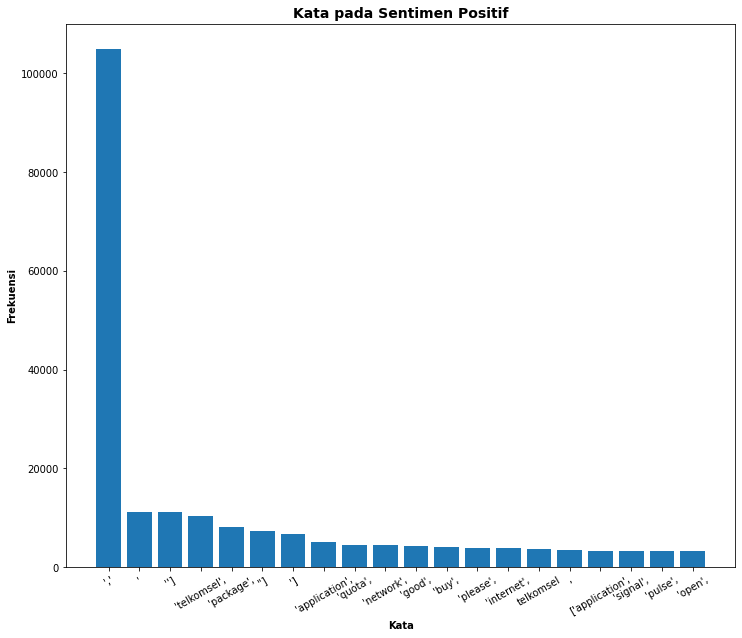

In [26]:
positif_kata = word_positif.value_counts().nlargest(20)

positif_x = positif_kata.index
positif_y = positif_kata.values

plt.figure(figsize = (12, 10))
plt.bar(positif_x, positif_y)
plt.xlabel("Kata", fontweight ='bold')
plt.ylabel("Frekuensi", fontweight ='bold')
plt.title("Kata pada Sentimen Positif", fontweight ='bold', fontsize = 14)
plt.xticks(positif_x, rotation = 30)
plt.show()

In [27]:
positif_score = word_positif.value_counts()
positif_score

','             104814
'                11213
'']              11115
'telkomsel',     10319
'package',        8074
                 ...  
'jarkkk',            1
'keelii',            1
'benerinn',          1
kswai                1
heighted             1
Length: 45515, dtype: int64

In [28]:
ytrain = ytrain.value_counts()
ytrain

 1    43716
-1    26196
Name: polaritas, dtype: int64

In [29]:
ytest = ytest.value_counts()
ytest

 1    10837
-1     6642
Name: polaritas, dtype: int64